In [1]:
from __future__ import print_function
import sys
#sys.path.insert(0,'Keras-2.0.8')
from keras import backend as K
import os
import numpy as np
from medpy.io import load,save
from keras.optimizers import SGD
from hybridnet import dense_rnn_net
from loss import weighted_crossentropy
from lib.funcs import predict_tumor_inwindow
from scipy import ndimage
from skimage import measure
import argparse
from pathlib import Path
import nibabel as nib
import os
import numpy as np
import csv
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
#import skimage.io as io
import tensorflow as tf

Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
dropbox_path = './results/'
test_path = '../data/liver/TestData'

In [19]:
i = 26
label_name = 'segmentation-%d' % i
label_file =  os.path.join(test_path,label_name+'.nii')
inputs_label,label_header=load(label_file)
inputs_label.max()


2

In [17]:
#合成文件名
def generate(subject_id):
    #     nii_name = 'volume-%d' % subject_id
    nii_name = 'resultstest-segmentation-%d' % subject_id
    nii_file =  os.path.join(dropbox_path,nii_name+'.nii')
    output_label_arr,img_header=load(nii_file)
    output_label_arr[output_label_arr==1.0] = 200
    
    img_name = 'volume-%d' % subject_id
    img_file =  os.path.join(test_path,img_name+'.nii')
    img_array,header=load(img_file)
    
    label_name = 'segmentation-%d' % subject_id
    label_file =  os.path.join(test_path,label_name+'.nii')
    inputs_label,label_header=load(label_file)
    inputs_label[inputs_label==1.0] = 200
    
    return img_array,inputs_label,output_label_arr

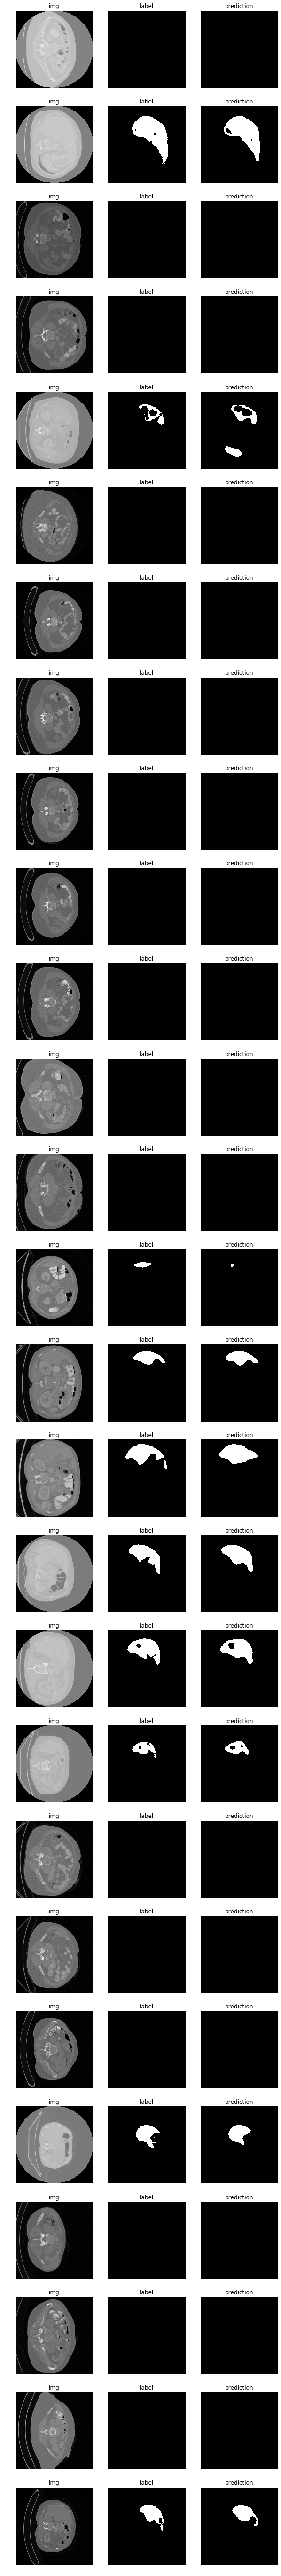

In [18]:
fig,ax = plt.subplots(27,3,figsize=[10,100])
for i in range(27):
    img_array,inputs_label,output_label_arr = generate(i)
    b = img_array.shape[2]
    a = int(b/2) 
#     output_label_arr90 = np.transpose(output_label_arr[:,:,a])
    
    ax[i,0].set_title('img')
    ax[i,0].imshow(img_array[:,:,a],cmap='gray')
    ax[i,0].axis('off')

    ax[i,1].set_title('label')
    ax[i,1].imshow(inputs_label[:,:,a],cmap='gray')
    ax[i,1].axis('off')

    ax[i,2].set_title('prediction')
    ax[i,2].imshow(output_label_arr[:,:,a],cmap='gray')
    ax[i,2].axis('off')
    
#     s = dice_loss(output_label_arr90,inputs_label)
#     print('dice_loss is %d' % s)

plt.show()

In [ ]:
plt.imshow(img_array[:,:,400],cmap='gray')
def sample_stack(stack, rows=23, cols=2):
    fig,ax = plt.subplots(rows,cols,figsize=[8,100])
    for i in range(rows*cols):
        ax[int(i/cols),int(i % cols)].set_title('slice %d' % i)
        ax[int(i/cols),int(i % cols)].imshow(stack[:,:,i+350])
        ax[int(i/cols),int(i % cols)].axis('off')
    plt.show()

sample_stack(img_array)

In [ ]:
#合成文件名
def generate(subject_id):    
#     nii_name = 'volume-%d' % subject_id
    nii_name = 'resultstest-segmentation-%d' % subject_id
    nii_file =  os.path.join(dropbox_path,nii_name+'.nii')
    img,img_header=load(nii_file)
    return img

In [ ]:
img_array = generate(20)
img_array[img_array>0] = 200
index = np.where(img_array!=1)
x = index[0]
y = index[1]
z = index[2]

In [ ]:
img_array.max()